# Scraping the justETF [Screener](https://www.justetf.com/en/find-etf.html)

## Content

- [Request the data](#request)
- [Clean up the data](#cleanup)
- [Enrich the data](#enrich)
- [Save the data](#save)
- [Visualize some statistics](#visualize)
- [Search over the data](#search)

In [1]:
%load_ext nb_black
%load_ext autoreload

<IPython.core.display.Javascript object>

In [2]:
%autoreload 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%aimport utils

<IPython.core.display.Javascript object>

In [3]:
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

<a id="request"></a>
## Request the data

In [4]:
last_four_years = [
    str((pd.Timestamp("now") - pd.DateOffset(years=i)).year) for i in range(1, 5)
]

<IPython.core.display.Javascript object>

In [5]:
DETAILS_KEY_MAPPING = {
    # IDs
    "isin": "isin",
    "wkn": "wkn",
    "ticker": "ticker",
    "valorNumber": "valor",
    # Basic info
    "name": "name",
    "groupValue": "index",
    "inceptionDate": "date",
    "strategy": "strategy",  # Custom field added during request
    "domicileCountry": "domicile_country",
    "fundCurrency": "currency",
    "hasSecuritiesLending": "securities_lending",
    "distributionPolicy": "dividends",
    "ter": "ter",
    "replicationMethod": "replication",
    "fundSize": "size",
    # Value return
    "ytdReturnCUR": "yesterday",
    "weekReturnCUR": "last_week",
    "monthReturnCUR": "last_month",
    "threeMonthReturnCUR": "last_three_months",
    "sixMonthReturnCUR": "last_six_months",
    "yearReturnCUR": "last_year",
    "threeYearReturnCUR": "last_three_years",
    "fiveYearReturnCUR": "last_five_years",
    "yearReturn1CUR": last_four_years[0],
    "yearReturn2CUR": last_four_years[1],
    "yearReturn3CUR": last_four_years[2],
    "yearReturn4CUR": last_four_years[3],
    # Dividends
    "currentDividendYield": "last_dividends",
    "yearDividendYield": "last_year_dividends",
    # Volatility
    "yearVolatilityCUR": "last_year_volatility",
    "threeYearVolatilityCUR": "last_three_years_volatility",
    "fiveYearVolatilityCUR": "last_five_years_volatility",
    # Return/Risk
    "yearReturnPerRiskCUR": "last_year_return_per_risk",
    "threeYearReturnPerRiskCUR": "last_three_years_return_per_risk",
    "fiveYearReturnPerRiskCUR": "last_five_years_return_per_risk",
    # Ignored fields
    # "groupParam": query for index search, indices are already received
    # "selected": not interesting
    # "clazz": some value, the most are empty strings, some are "highl_c"
    # "savingsPlanReady": "Savings plan ready from x.xx EUR" text
}

<IPython.core.display.Javascript object>

In [6]:
INT64_COLUMNS = ["valor", "size"]
CATEGORY_COLUMNS = ["strategy", "domicile_country", "dividends", "replication"]
FLOAT_COLUMNS = [
    "ter",
    "yesterday",
    "last_week",
    "last_month",
    "last_three_months",
    "last_six_months",
    "last_year",
    "last_three_years",
    "last_five_years",
    "last_dividends",
    "last_year_dividends",
    "last_year_volatility",
    "last_three_years_volatility",
    "last_five_years_volatility",
    "last_year_return_per_risk",
    "last_three_years_return_per_risk",
    "last_five_years_return_per_risk",
] + last_four_years

<IPython.core.display.Javascript object>

In [7]:
data = {key: [] for key in DETAILS_KEY_MAPPING}
for sample in utils.make_request():
    for key, values in data.items():
        values.append(sample[key])

<IPython.core.display.Javascript object>

In [8]:
etf_df = pd.DataFrame(data).rename(columns=DETAILS_KEY_MAPPING)

<IPython.core.display.Javascript object>

In [9]:
etf_df.shape

(3349, 35)

<IPython.core.display.Javascript object>

In [10]:
etf_df.head(3)

,isin,wkn,ticker,valor,name,index,date,strategy,domicile_country,currency,securities_lending,dividends,ter,replication,size,yesterday,last_week,last_month,last_three_months,last_six_months,last_year,last_three_years,last_five_years,2023,2022,2021,2020,last_dividends,last_year_dividends,last_year_volatility,last_three_years_volatility,last_five_years_volatility,last_year_return_per_risk,last_three_years_return_per_risk,last_five_years_return_per_risk
0,GB00BM9JYH62,A3GZKD,AVMX,-,Global X Aave ETP,Aave,13.03.23,Long-only,Jersey,USD,No,Accumulating,0.99%,Physically<br />backed,0,15.36%,11.89%,24.96%,30.02%,105.83%,70.53%,-,-,-,-,-,-,-,-,74.74%,-,-,0.94,-,-
1,IE000GGQK173,A3D4VW,R8T,125589092,abrdn Global Real Estate Active Thematics UCIT...,abrdn Global Real Estate Active Thematics,22.02.23,Long-only,Ireland,USD,No,Accumulating,0.40%,Full replication,10,-1.82%,1.21%,1.88%,-1.08%,9.93%,9.54%,-,-,-,-,-,-,-,-,15.23%,-,-,0.62,-,-
2,IE00B0M62Y33,A0HGWF,IUSJ,2308837,iShares AEX UCITS ETF,AEX®,18.11.05,Long-only,Ireland,EUR,Yes,Distributing,0.30%,Full replication,622,12.02%,2.17%,3.09%,12.44%,22.56%,22.89%,34.18%,79.49%,16.77%,-11.78%,29.89%,5.14%,1.90%,2.28%,11.20%,16.15%,18.52%,2.04,0.64,0.67


<IPython.core.display.Javascript object>

In [11]:
len(etf_df["isin"].unique())

3199

<IPython.core.display.Javascript object>

<a id="cleanup"></a>
## Clean up the data

In [12]:
for column in etf_df:
    etf_df[column] = (
        etf_df[column]
        .str.replace("<br />", " ")
        .str.replace(",", "")
        .replace("-", pd.NA)
    )

<IPython.core.display.Javascript object>

In [13]:
for column in INT64_COLUMNS:
    try:
        etf_df[column] = etf_df[column].astype("Int64")
    except BaseException as e:
        print(type(e))
        str_e = str(e)
        print(str_e)
        err_value = str_e[str_e.index("'") + 1 : str_e.rindex("'")]

<class 'ValueError'>
invalid literal for int() with base 10: 'BPDX196'


<IPython.core.display.Javascript object>

In [14]:
for column in CATEGORY_COLUMNS:
    etf_df[column] = etf_df[column].astype("category")

<IPython.core.display.Javascript object>

In [15]:
for column in FLOAT_COLUMNS:
    etf_df[column] = (
        etf_df[column].str.removesuffix("%").replace(pd.NA, "nan").astype("float64")
    )

<IPython.core.display.Javascript object>

In [16]:
etf_df["date"] = pd.to_datetime(etf_df["date"], format="%d.%m.%y")

<IPython.core.display.Javascript object>

Keep insertion date, but also calculate age in years to simplify search over dataset.

In [17]:
columns = etf_df.columns.tolist()
etf_df["age"] = (
    pd.Timestamp("now") - pd.to_datetime(etf_df["date"], format="%d.%m.%y")
) / pd.to_timedelta(365, unit="D")
columns.insert(columns.index("date") + 1, "age")
etf_df = etf_df[columns]

<IPython.core.display.Javascript object>

In [18]:
etf_df["securities_lending"] = (
    etf_df["securities_lending"].replace({"Yes": True, "No": False}).astype("bool")
)

<IPython.core.display.Javascript object>

Separate hedged flag from currency.

In [19]:
columns = etf_df.columns.tolist()
columns.insert(columns.index("currency") + 1, "hedged")
etf_df["hedged"] = etf_df["currency"].str.endswith("Hedged")
etf_df["currency"] = etf_df["currency"].str.removesuffix(" Hedged").astype("category")
etf_df = etf_df[columns]

<IPython.core.display.Javascript object>

In [20]:
etf_df.head(3)

,isin,wkn,ticker,valor,name,index,date,age,strategy,domicile_country,currency,hedged,securities_lending,dividends,ter,replication,size,yesterday,last_week,last_month,last_three_months,last_six_months,last_year,last_three_years,last_five_years,2023,2022,2021,2020,last_dividends,last_year_dividends,last_year_volatility,last_three_years_volatility,last_five_years_volatility,last_year_return_per_risk,last_three_years_return_per_risk,last_five_years_return_per_risk
0,GB00BM9JYH62,A3GZKD,AVMX,<NA>,Global X Aave ETP,Aave,2023-03-13,1.042777,Long-only,Jersey,USD,False,False,Accumulating,0.99,Physically backed,0,15.36,11.89,24.96,30.02,105.83,70.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.74,NaN,NaN,0.94,NaN,NaN
1,IE000GGQK173,A3D4VW,R8T,125589092,abrdn Global Real Estate Active Thematics UCIT...,abrdn Global Real Estate Active Thematics,2023-02-22,1.094832,Long-only,Ireland,USD,False,False,Accumulating,0.40,Full replication,10,-1.82,1.21,1.88,-1.08,9.93,9.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.23,NaN,NaN,0.62,NaN,NaN
2,IE00B0M62Y33,A0HGWF,IUSJ,2308837,iShares AEX UCITS ETF,AEX®,2005-11-18,18.368805,Long-only,Ireland,EUR,False,True,Distributing,0.30,Full replication,622,12.02,2.17,3.09,12.44,22.56,22.89,34.18,79.49,16.77,-11.78,29.89,5.14,1.9,2.28,11.20,16.15,18.52,2.04,0.64,0.67


<IPython.core.display.Javascript object>

<a id="enrich"></a>
## Enrich the data

In [21]:
columns = etf_df.columns.tolist()

<IPython.core.display.Javascript object>

In [22]:
etf_df["asset"] = pd.NA
for asset, name in utils.ASSETS.items():
    isins = {sample["isin"] for sample in utils.make_request(asset=asset)}
    mask = etf_df["isin"].isin(isins)
    etf_df.loc[mask, "asset"] = name
etf_df["asset"] = etf_df["asset"].astype("category")

<IPython.core.display.Javascript object>

In [23]:
etf_df["instrument"] = pd.NA
for instrument, name in utils.INSTRUMENTS.items():
    isins = {sample["isin"] for sample in utils.make_request(instrument=instrument)}
    mask = etf_df["isin"].isin(isins)
    etf_df.loc[mask, "instrument"] = name
etf_df["instrument"] = etf_df["instrument"].astype("category")

<IPython.core.display.Javascript object>

In [24]:
etf_df["region"] = pd.NA
for region, name in utils.REGIONS.items():
    isins = {sample["isin"] for sample in utils.make_request(region=region)}
    mask = etf_df["isin"].isin(isins)
    etf_df.loc[mask, "region"] = name
etf_df["region"] = etf_df["region"].astype("category")

<IPython.core.display.Javascript object>

In [25]:
new_columns = ["asset", "instrument", "region"]
for exchange, name in utils.EXCHANGES.items():
    name = f"at_{name}"
    etf_df[name] = False
    new_columns.append(name)
    isins = {sample["isin"] for sample in utils.make_request(exchange=exchange)}
    mask = etf_df["isin"].isin(isins)
    etf_df.loc[mask, name] = True

<IPython.core.display.Javascript object>

In [26]:
etf_df = etf_df[
    columns[: columns.index("size") + 1]
    + new_columns
    + columns[columns.index("size") + 1 :]
]

<IPython.core.display.Javascript object>

In [27]:
etf_df.shape

(3349, 46)

<IPython.core.display.Javascript object>

In [28]:
etf_df.head(3)

,isin,wkn,ticker,valor,name,index,date,age,strategy,domicile_country,currency,hedged,securities_lending,dividends,ter,replication,size,asset,instrument,region,at_gettex,at_xetra,at_london,at_euronext,at_stuttgart,at_six,yesterday,last_week,last_month,last_three_months,last_six_months,last_year,last_three_years,last_five_years,2023,2022,2021,2020,last_dividends,last_year_dividends,last_year_volatility,last_three_years_volatility,last_five_years_volatility,last_year_return_per_risk,last_three_years_return_per_risk,last_five_years_return_per_risk
0,GB00BM9JYH62,A3GZKD,AVMX,<NA>,Global X Aave ETP,Aave,2023-03-13,1.042777,Long-only,Jersey,USD,False,False,Accumulating,0.99,Physically backed,0,Cryptocurrencies,ETN,NaN,True,True,False,False,False,False,15.36,11.89,24.96,30.02,105.83,70.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.74,NaN,NaN,0.94,NaN,NaN
1,IE000GGQK173,A3D4VW,R8T,125589092,abrdn Global Real Estate Active Thematics UCIT...,abrdn Global Real Estate Active Thematics,2023-02-22,1.094832,Long-only,Ireland,USD,False,False,Accumulating,0.40,Full replication,10,Real Estate,ETF,World,True,True,False,False,False,False,-1.82,1.21,1.88,-1.08,9.93,9.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.23,NaN,NaN,0.62,NaN,NaN
2,IE00B0M62Y33,A0HGWF,IUSJ,2308837,iShares AEX UCITS ETF,AEX®,2005-11-18,18.368805,Long-only,Ireland,EUR,False,True,Distributing,0.30,Full replication,622,Equity,ETF,NaN,True,False,True,False,False,True,12.02,2.17,3.09,12.44,22.56,22.89,34.18,79.49,16.77,-11.78,29.89,5.14,1.9,2.28,11.20,16.15,18.52,2.04,0.64,0.67


<IPython.core.display.Javascript object>

<a id="save"></a>
## Save the data

In [29]:
etf_df.to_csv("justetf.csv", index=False)

<IPython.core.display.Javascript object>

<a id="visualize"></a>
## Visualize some statistics

<AxesSubplot:xlabel='Count', ylabel='strategy'>

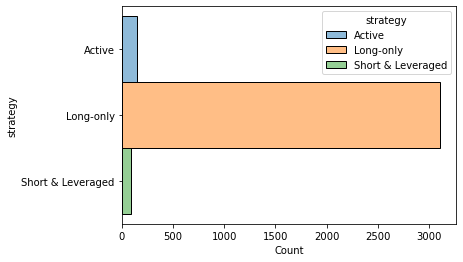

<IPython.core.display.Javascript object>

In [30]:
sns.histplot(etf_df, y="strategy", hue="strategy", discrete=True)

<AxesSubplot:xlabel='Count', ylabel='instrument'>

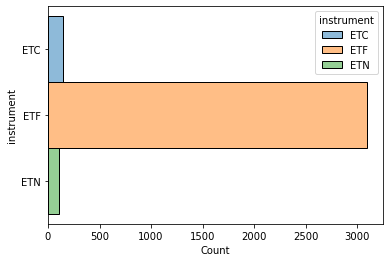

<IPython.core.display.Javascript object>

In [31]:
sns.histplot(etf_df, y="instrument", hue="instrument", discrete=True)

<AxesSubplot:xlabel='Count', ylabel='asset'>

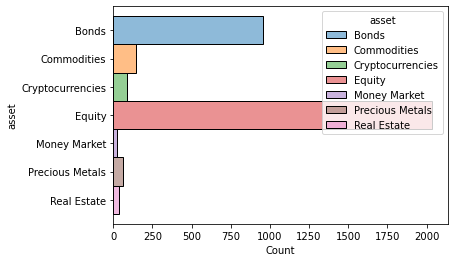

<IPython.core.display.Javascript object>

In [32]:
sns.histplot(etf_df, y="asset", hue="asset", discrete=True)

<AxesSubplot:xlabel='Count', ylabel='region'>

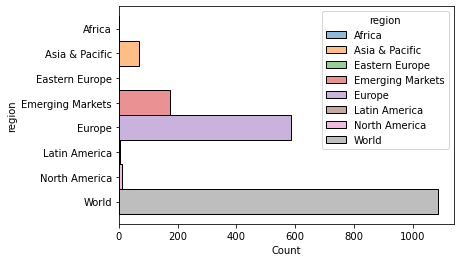

<IPython.core.display.Javascript object>

In [33]:
sns.histplot(etf_df, y="region", hue="region", discrete=True)

<AxesSubplot:xlabel='Count', ylabel='currency'>

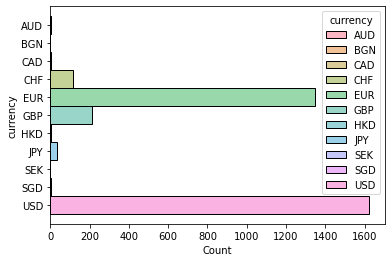

<IPython.core.display.Javascript object>

In [34]:
sns.histplot(etf_df, y="currency", hue="currency", discrete=True)

<AxesSubplot:xlabel='age', ylabel='size'>

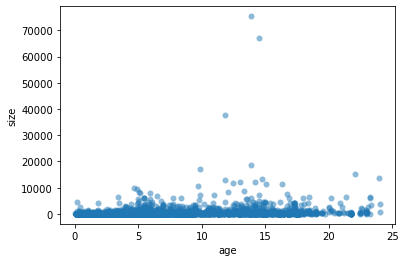

<IPython.core.display.Javascript object>

In [35]:
sns.scatterplot(data=etf_df, x="age", y="size", alpha=0.5, linewidth=0)

The most frequent indices.

In [36]:
index_counts = etf_df["index"].value_counts()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Count', ylabel='index'>

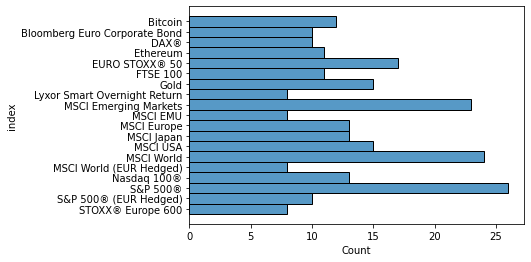

<IPython.core.display.Javascript object>

In [37]:
sns.histplot(
    etf_df[etf_df["index"].isin(index_counts[index_counts > 7].index)],
    y="index",
    discrete=True,
)

<a id="search"></a>
## Search over the data

Compare accumulating MSCI World ETFs older than 2 years with fond size greater than € 50M.

In [38]:
acc_msci_world_df = etf_df[
    (etf_df["index"] == "MSCI World")
    & (etf_df["dividends"] == "Accumulating")
    & (etf_df["age"] > 2)
    & (etf_df["size"] > 50)
]

<IPython.core.display.Javascript object>

In [39]:
acc_msci_world_df.shape

(9, 46)

<IPython.core.display.Javascript object>

In [40]:
acc_msci_world_df

,isin,wkn,ticker,valor,name,index,date,age,strategy,domicile_country,currency,hedged,securities_lending,dividends,ter,replication,size,asset,instrument,region,at_gettex,at_xetra,at_london,at_euronext,at_stuttgart,at_six,yesterday,last_week,last_month,last_three_months,last_six_months,last_year,last_three_years,last_five_years,2023,2022,2021,2020,last_dividends,last_year_dividends,last_year_volatility,last_three_years_volatility,last_five_years_volatility,last_year_return_per_risk,last_three_years_return_per_risk,last_five_years_return_per_risk
2171,FR0014003IY1,LYX9ZB,WLDC,<NA>,Amundi MSCI World II UCITS ETF Acc,MSCI World,2021-06-02,2.820859,Long-only,France,EUR,False,False,Accumulating,0.30,Swap based Unfunded,68,Equity,ETF,World,False,False,False,False,False,False,10.38,1.66,2.58,10.65,16.77,28.30,NaN,NaN,19.77,-12.72,NaN,NaN,NaN,NaN,9.75,NaN,NaN,2.89,NaN,NaN
2176,LU1681043599,A2H59Q,AMEW,38784696,Amundi MSCI World UCITS ETF EUR (C),MSCI World,2009-06-16,14.790722,Long-only,Luxembourg,EUR,False,False,Accumulating,0.38,Swap based Unfunded,3303,Equity,ETF,World,True,True,False,True,True,True,10.68,1.36,3.47,10.96,18.55,28.47,38.59,83.29,19.46,-12.87,30.94,6.26,NaN,NaN,9.77,13.83,17.38,2.90,0.83,0.74
2177,LU1681043672,A2H59R,XAMZ,38784715,Amundi MSCI World UCITS ETF USD (C),MSCI World,2010-06-17,13.787983,Long-only,Luxembourg,USD,False,False,Accumulating,0.38,Swap based Unfunded,65,Equity,ETF,World,True,False,True,True,False,True,10.64,1.25,3.40,11.02,18.71,28.17,38.32,83.34,19.35,-13.17,31.85,6.04,NaN,NaN,10.43,15.06,18.15,2.69,0.76,0.71
2179,LU1781541179,LYX0YD,LCUW,40587053,Amundi MSCI World V UCITS ETF Acc,MSCI World,2018-02-28,6.081133,Long-only,Luxembourg,USD,False,True,Accumulating,0.12,Full replication,4445,Equity,ETF,World,True,True,True,True,True,False,10.97,1.53,3.62,10.97,19.10,28.80,39.06,84.33,19.50,-13.19,31.96,6.12,NaN,NaN,10.38,16.09,18.70,2.77,0.72,0.70
2183,IE00B60SX394,A0RGCS,SC0J,10128224,Invesco MSCI World UCITS ETF Acc,MSCI World,2009-04-02,14.996202,Long-only,Ireland,USD,False,False,Accumulating,0.19,Swap based Unfunded,4353,Equity,ETF,World,True,True,True,False,True,True,10.78,1.33,3.50,11.15,18.93,28.58,39.41,85.77,19.66,-12.96,32.12,6.28,NaN,NaN,10.40,15.02,18.20,2.74,0.78,0.72
2184,IE00B4L5Y983,A0RPWH,EUNL,10608388,iShares Core MSCI World UCITS ETF USD (Acc),MSCI World,2009-09-25,14.514010,Long-only,Ireland,USD,False,True,Accumulating,0.20,Optimized sampling,67045,Equity,ETF,World,True,True,True,False,True,True,10.82,1.38,3.55,11.19,18.94,28.58,39.27,85.23,19.55,-12.96,32.10,6.13,NaN,NaN,10.43,15.02,18.16,2.73,0.78,0.72
2187,IE00BFY0GT14,A2N6CW,SPPW,46170158,SPDR MSCI World UCITS ETF,MSCI World,2019-02-28,5.081133,Long-only,Ireland,USD,False,True,Accumulating,0.12,Optimized sampling,4968,Equity,ETF,World,True,True,True,False,False,True,11.00,1.47,3.69,11.34,19.13,28.84,39.92,86.04,19.60,-12.74,32.09,6.06,NaN,NaN,10.41,14.99,18.14,2.76,0.79,0.73
2191,LU0274208692,DBX1MW,DBXW,2825395,Xtrackers MSCI World Swap UCITS ETF 1C,MSCI World,2006-12-19,17.283873,Long-only,Luxembourg,USD,False,False,Accumulating,0.45,Swap based Unfunded,3861,Equity,ETF,World,True,True,True,False,True,True,10.71,1.30,3.47,11.06,18.79,28.31,38.61,84.33,19.44,-13.13,31.91,6.14,NaN,NaN,10.41,15.00,18.18,2.71,0.77,0.71
2193,IE00BJ0KDQ92,A1XB5U,XDWD,24869934,Xtrackers MSCI World UCITS ETF 1C,MSCI World,2014-07-22,9.689353,Long-only,Ireland,USD,False,True,Accumulating,0.19,Optimized sampling,10678,Equity,ETF,World,True,True,True,False,True,True,10.84,1.41,3.57,11.20,19.00,28.60,39.26,85.15,19.61,-13.03,32.04,6.19,NaN,NaN,10.42,14.97,18.12,2.74,0.78,0.72


<IPython.core.display.Javascript object>

In [41]:
COLUMNS_MAPPINGS = {
    "Short-term return": {
        "isin": "isin",
        "last_six_months": "Last 5 months",
        "last_three_months": "Last 3 months",
        "last_month": "Last month",
        "last_week": "Last week",
        "yesterday": "Yesterday",
    },
    "Mid-term return": {
        "isin": "isin",
        "last_five_years": "last 5 years",
        "last_three_years": "last 3 years",
        "last_year": "last year",
    },
    "Volatility": {
        "isin": "isin",
        "last_five_years_volatility": "Last 5 years",
        "last_three_years_volatility": "Last 3 years",
        "last_year_volatility": "Last year",
    },
    "Return/Risk": {
        "isin": "isin",
        "last_five_years_return_per_risk": "Last 5 years",
        "last_three_years_return_per_risk": "Last 3 years",
        "last_year_return_per_risk": "Last year",
    },
}

<IPython.core.display.Javascript object>

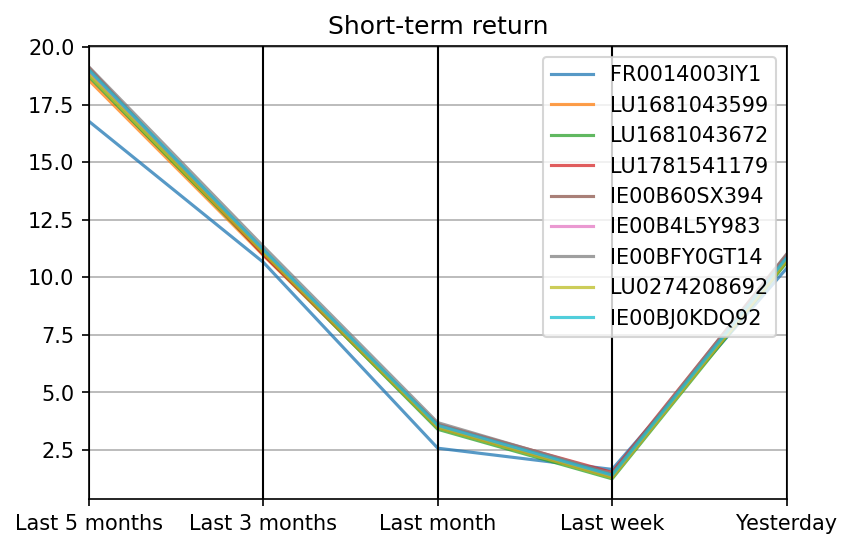

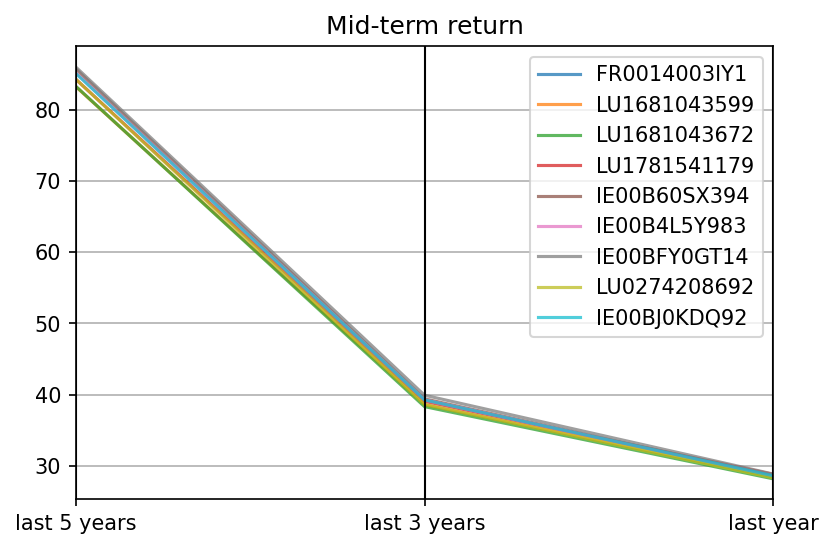

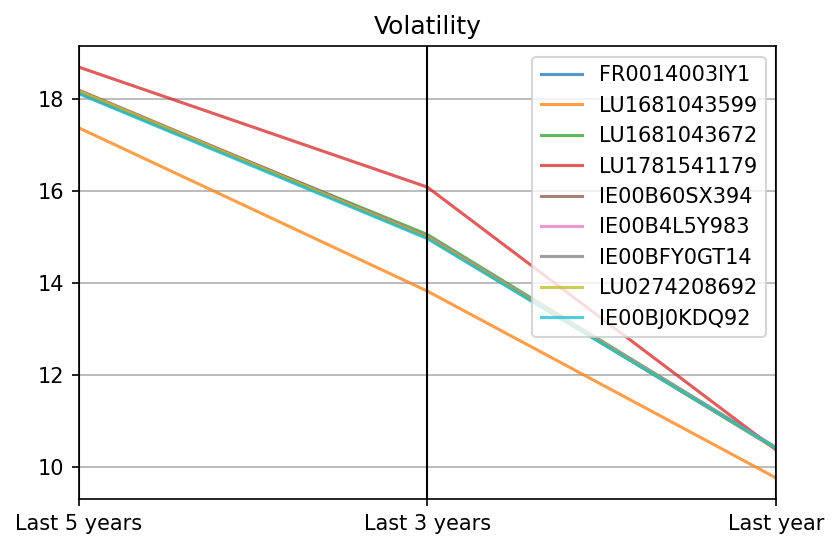

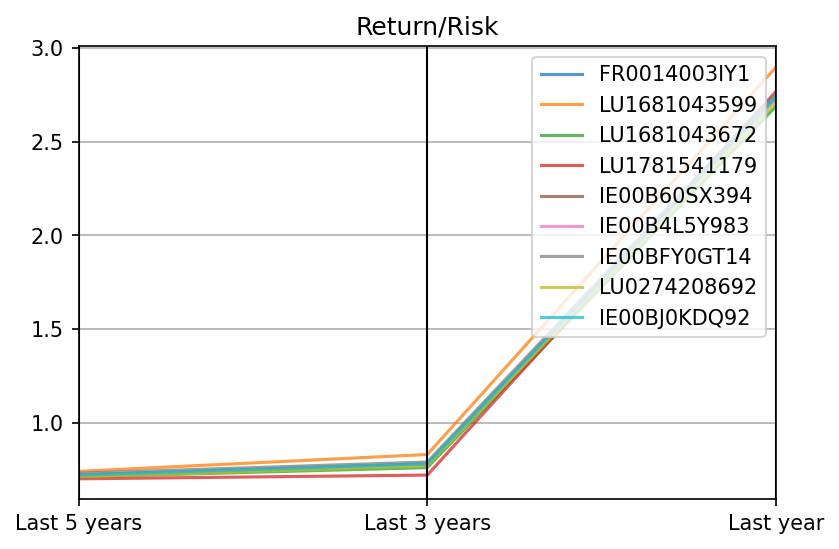

<IPython.core.display.Javascript object>

In [42]:
for title, mapping in COLUMNS_MAPPINGS.items():
    df = acc_msci_world_df[mapping.keys()].rename(columns=mapping)
    plt.figure(dpi=150)
    ax = pd.plotting.parallel_coordinates(df, "isin", colormap="tab10", alpha=0.75)
    _ = ax.set_title(title)

In [43]:
df = acc_msci_world_df[["isin"] + list(reversed(last_four_years))]

<IPython.core.display.Javascript object>

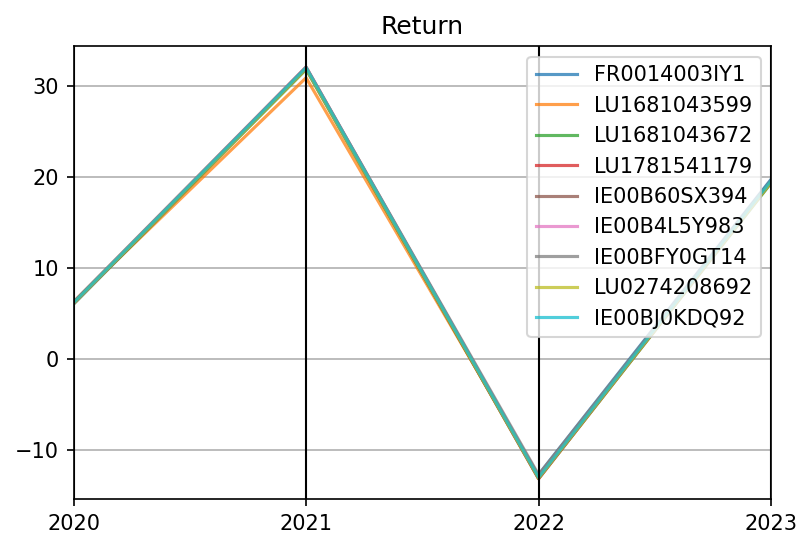

<IPython.core.display.Javascript object>

In [44]:
plt.figure(dpi=150)
ax = pd.plotting.parallel_coordinates(df, "isin", colormap="tab10", alpha=0.75)
_ = ax.set_title("Return")

In [45]:
df = df.set_index("isin")

<IPython.core.display.Javascript object>

In [46]:
ter = (100 - acc_msci_world_df.set_index("isin")["ter"]) / 100

<IPython.core.display.Javascript object>

In [47]:
df = ((100 + df) / 100).mul(ter, axis=0)

<IPython.core.display.Javascript object>

In [48]:
cum_df = df.copy()

<IPython.core.display.Javascript object>

In [49]:
df = (df * 100 - 100).reset_index()

<IPython.core.display.Javascript object>

In [50]:
cum_df[last_four_years[1]] *= cum_df[last_four_years[0]]
cum_df[last_four_years[2]] *= cum_df[last_four_years[1]]
cum_df[last_four_years[3]] *= cum_df[last_four_years[2]]

<IPython.core.display.Javascript object>

In [51]:
cum_df = (cum_df * 100 - 100).reset_index()

<IPython.core.display.Javascript object>

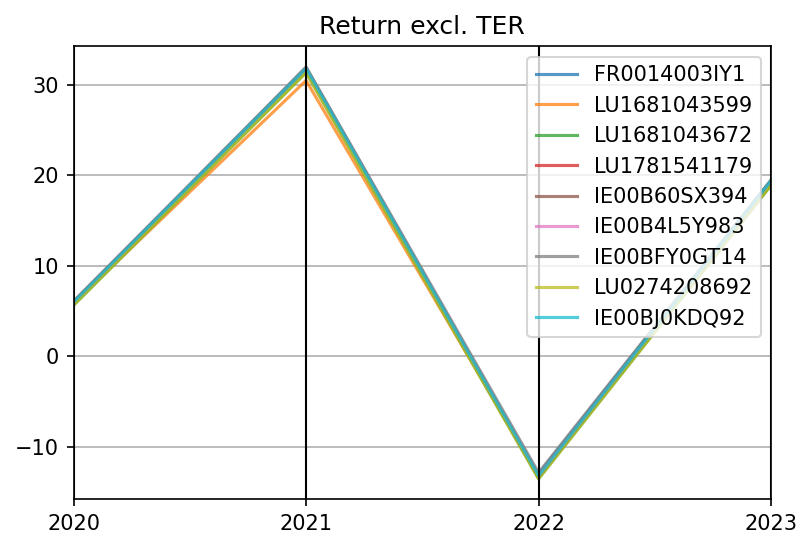

<IPython.core.display.Javascript object>

In [52]:
plt.figure(dpi=150)
ax = pd.plotting.parallel_coordinates(df, "isin", colormap="tab10", alpha=0.75)
_ = ax.set_title("Return excl. TER")

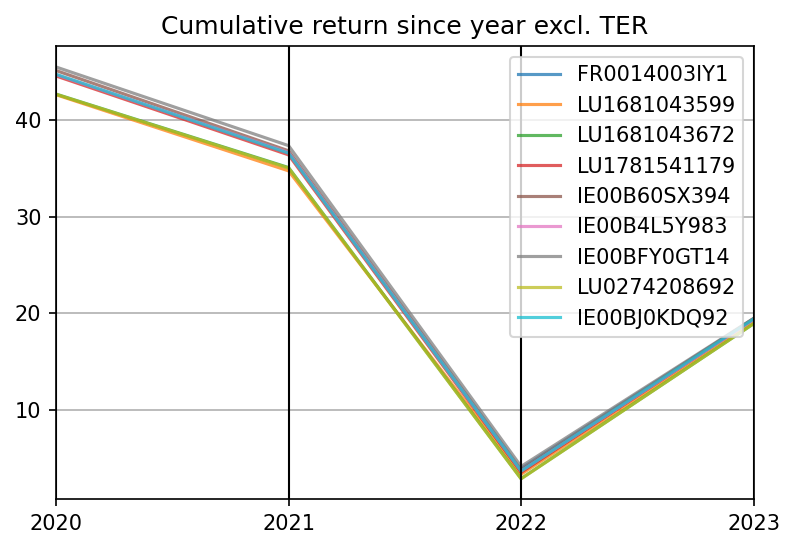

<IPython.core.display.Javascript object>

In [53]:
plt.figure(dpi=150)
ax = pd.plotting.parallel_coordinates(cum_df, "isin", colormap="tab10", alpha=0.75)
_ = ax.set_title("Cumulative return since year excl. TER")